# Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Preprocessing

## Training Image Preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_vegetable_recognition/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


## Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_vegetable_recognition/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


# Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

## Building convolution layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64, 64, 3]))
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) # We dropping some neuron to avoid overfitting

In [ ]:
# Output Layer
cnn.add(tf.keras.layers.Dense(units = 36, activation = 'softmax'))

# Compiling and Training Phase

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                 

In [ ]:
training_history = cnn.fit(x = training_set, validation_data = validation_set, epochs = 32)

Epoch 1/32
98/98 [==============================] - 151s 1s/step - loss: 3.5732 - accuracy: 0.0321 - val_loss: 3.5792 - val_accuracy: 0.0399
Epoch 2/32
98/98 [==============================] - 143s 1s/step - loss: 3.5611 - accuracy: 0.0395 - val_loss: 3.4775 - val_accuracy: 0.0741
Epoch 3/32
98/98 [==============================] - 140s 1s/step - loss: 3.5603 - accuracy: 0.0446 - val_loss: 3.4786 - val_accuracy: 0.0712
Epoch 4/32
98/98 [==============================] - 150s 1s/step - loss: 3.5313 - accuracy: 0.0514 - val_loss: 3.5039 - val_accuracy: 0.0997
Epoch 5/32
98/98 [==============================] - 157s 2s/step - loss: 3.4274 - accuracy: 0.0860 - val_loss: 3.1190 - val_accuracy: 0.2051
Epoch 6/32
98/98 [==============================] - 150s 1s/step - loss: 3.2097 - accuracy: 0.1303 - val_loss: 2.6334 - val_accuracy: 0.3504
Epoch 7/32
98/98 [==============================] - 148s 1s/step - loss: 2.9821 - accuracy: 0.1878 - val_loss: 2.2696 - val_accuracy: 0.4217
Epoch 8/32
98

# Saving Model

In [ ]:
cnn.save('./model/trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
training_history.history # Return Dictionary of History

{'loss': [3.5732195377349854,
  3.561103343963623,
  3.5603108406066895,
  3.5312812328338623,
  3.427391290664673,
  3.2097456455230713,
  2.9821054935455322,
  2.653688907623291,
  2.400273561477661,
  2.090532064437866,
  1.9060810804367065,
  1.6838634014129639,
  1.5213643312454224,
  1.3225899934768677,
  1.245904803276062,
  1.1572973728179932,
  1.0610069036483765,
  1.0358244180679321,
  0.9747385382652283,
  0.880885660648346,
  0.834484338760376,
  0.7805049419403076,
  0.7358911037445068,
  0.781469464302063,
  0.6443397998809814,
  0.6197687387466431,
  0.5637065768241882,
  0.5968495011329651,
  0.5525798797607422,
  0.5219621658325195,
  0.4471803903579712,
  0.4440416395664215],
 'accuracy': [0.03210273012518883,
  0.0394863560795784,
  0.044622793793678284,
  0.051364365965127945,
  0.08603531122207642,
  0.13033707439899445,
  0.18780095875263214,
  0.26452648639678955,
  0.3274478316307068,
  0.41316211223602295,
  0.4635634124279022,
  0.5235955119132996,
  0.582343

In [ ]:
# Recording History in json
import json
with open('training_hist.json', 'w') as f:
  json.dump(training_history.history, f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Calculating Accuracy of Model Achieved on Validation Set

In [ ]:
print("Validation set Accuracy: {} %". format(training_history.history['val_accuracy'][-1] * 100))

Validation set Accuracy: 92.30769276618958 %


# Accuracy Visualization

## Training Accuracy Visualization

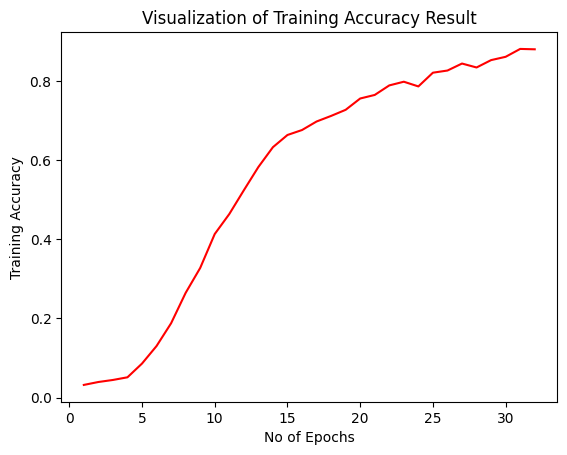

In [ ]:
epochs = [i for i in range(1, 33)]
plt.plot(epochs, training_history.history['accuracy'], color='red')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

## Validation Accuracy Visualization

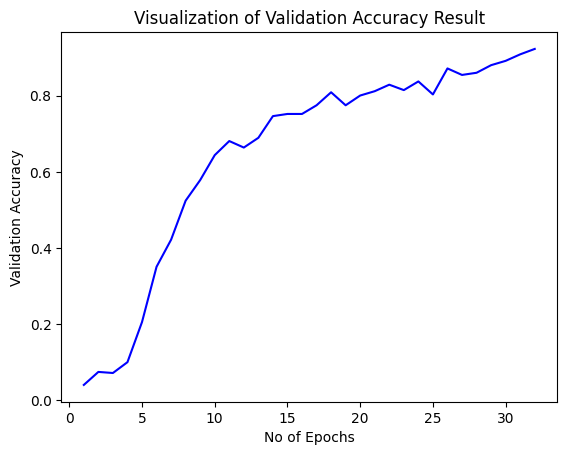

In [ ]:
plt.plot(epochs, training_history.history['val_accuracy'], color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

# Evaluating Model

In [ ]:
traning_loss, training_accuracy = cnn.evaluate(training_set)

98/98 [==============================] - 108s 1s/step - loss: 0.2220 - accuracy: 0.9445


In [ ]:
print(traning_loss, training_accuracy)

0.22197988629341125 0.9444622993469238


In [ ]:
val_loss, val_accuracy = cnn.evaluate(validation_set)

11/11 [==============================] - 13s 238ms/step - loss: 0.5943 - accuracy: 0.9231


In [ ]:
print(val_loss, val_accuracy)

0.5942703485488892 0.9230769276618958


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_vegetable_recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss, test_accuracy = cnn.evaluate(test_set)

12/12 [==============================] - 119s 2s/step - loss: 0.5816 - accuracy: 0.9248


In [ ]:
print(test_loss, test_accuracy)

0.5815614461898804 0.9247910976409912
